# Goal
tujuan dari model ini adalah dapat mengklasifikasikan gambar kucing dan anjing

# Part 1

## Import Library

In [20]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4) #untuk mengubah ukuran font
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import pandas as pd

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Load Dataset

In [22]:
# masuk ke folder dataset
% cd /content/gdrive/My Drive/dataset/DogVSCat

/content/gdrive/My Drive/dataset/DogVSCat


In [23]:
def load_data(): #load train and test set
    datasets = ['train_set', 'test_set']
    output = []
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        for folder in os.listdir(dataset): # untuk iterasi folder train dan test
            label = class_names_label[folder]
            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))): # untuk iterasi folder class di dalamnya
                
                img_path = os.path.join(os.path.join(dataset, folder), file) # mendapatkan path name dari data
            
                image = cv2.imread(img_path) #baca gambar
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # ubah dari BGR ke RGB
                image = cv2.resize(image, IMAGE_SIZE) #atur ukuran
                
                images.append(image) #masukkan ke list
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
def load_data_pred(): #load pred set
    datasets = ['pred_set']
    output = []

    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))

        for file in tqdm(os.listdir(dataset)): # untuk iterasi folder class di dalamnya
                
            img_path = os.path.join(dataset, file) # mendapatkan path name dari data
        
            image = cv2.imread(img_path) #baca gambar
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # ubah dari BGR ke RGB
            image = cv2.resize(image, IMAGE_SIZE) #atur ukuran
            
            images.append(image) #masukkan ke list
                
        images = np.array(images, dtype = 'float32')
        
        output.append((images))

    return output

In [24]:
class_names = ['dogs', 'cats'] 
class_names_label = {class_name:i for i, class_name in enumerate(class_names)} # memberikan label pada setiap class_name (0 untuk dogs, 1 untuk cats)
nb_classes = len(class_names)
IMAGE_SIZE = (150, 150) #mengubah ukuran image

In [25]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading train_set


100%|██████████| 4010/4010 [00:31<00:00, 128.81it/s]


Loading test_set


100%|██████████| 1010/1010 [00:06<00:00, 154.70it/s]


In [ ]:
pred_images = load_data_pred()

In [ ]:
pred_images = pred_images[0]
pred_images = pred_images / 255.0

In [26]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25) #random image

## Data Exploration

In [27]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Jumlah data training: {}".format(n_train))
print ("Jumlah data test: {}".format(n_test))
print ("Ukuran setiap gambar: {}".format(IMAGE_SIZE))

Jumlah data training: 8020
Jumlah data test: 2020
Ukuran setiap gambar: (150, 150)


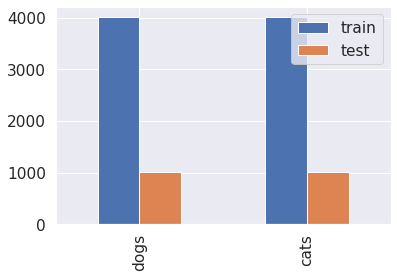

In [28]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

`dataset untuk anjing dan kucing jumlahnya sama yaitu masing-masing 4010 untuk data training dan 1010 untuk data testing`

In [29]:
def random_image(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure();
    plt.imshow(images[index]);
    plt.xticks([]);plt.yticks([]);plt.axis('off');
    plt.title('Random {}'.format(class_names[labels[index]]) +' No.{} '.format(index) )
    plt.show()

In [30]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

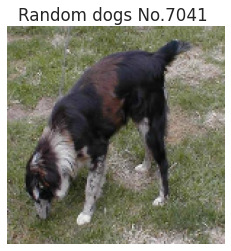

In [31]:
random_image(class_names, train_images, train_labels)

`menampilkan gambar secara acak`

In [32]:
def group_random_image (class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([]); plt.yticks([]); plt.grid(False);
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [33]:
# group_random_image(class_names, train_images, train_labels)

## Modelling Process

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [35]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
51/51 [==============================] - 5s 87ms/step - loss: 0.8817 - accuracy: 0.5463 - val_loss: 0.6638 - val_accuracy: 0.6284
Epoch 2/10
51/51 [==============================] - 4s 75ms/step - loss: 0.6234 - accuracy: 0.6607 - val_loss: 0.6395 - val_accuracy: 0.6291
Epoch 3/10
51/51 [==============================] - 4s 74ms/step - loss: 0.5535 - accuracy: 0.7146 - val_loss: 0.5738 - val_accuracy: 0.6839
Epoch 4/10
51/51 [==============================] - 4s 76ms/step - loss: 0.4829 - accuracy: 0.7667 - val_loss: 0.5532 - val_accuracy: 0.7207
Epoch 5/10
51/51 [==============================] - 4s 76ms/step - loss: 0.4098 - accuracy: 0.8105 - val_loss: 0.5372 - val_accuracy: 0.7357
Epoch 6/10
51/51 [==============================] - 4s 75ms/step - loss: 0.3423 - accuracy: 0.8482 - val_loss: 0.6510 - val_accuracy: 0.6958
Epoch 7/10
51/51 [==============================] - 4s 79ms/step - loss: 0.2850 - accuracy: 0.8811 - val_loss: 0.5828 - val_accuracy: 0.7413
Epoch 8/10
51

In [36]:
def evaluation_plot(history):
    fig = plt.figure(figsize=(15,7.5))

    # Plot loss function
    plt.subplot(221)
    plt.plot(history.history['loss'],'ko--', label = "loss")
    plt.plot(history.history['val_loss'], 'go--', label = "val_loss")
    plt.title("loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(222)
    plt.plot(history.history['accuracy'],'ko--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'go--', label = "val_accuracy")
    plt.title("acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()


    plt.show()

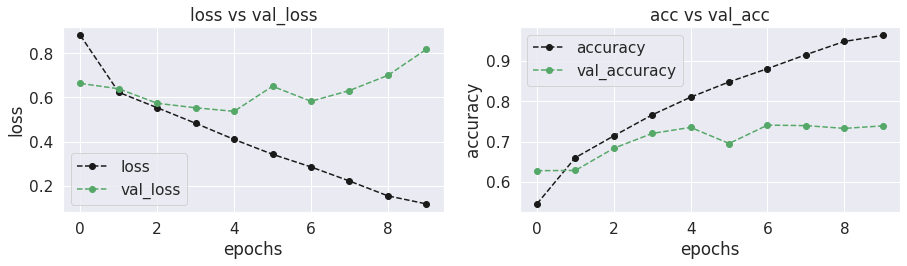

In [37]:
evaluation_plot(history)

`basic model sudah lumayan baik dimana lossnya sudah dibawah 1, namun masih dapat ditingkatkan`

In [38]:
test_loss = model.evaluate(test_images, test_labels) # evaluate me-return nilai dari hasil test

64/64 [==============================] - 1s 11ms/step - loss: 0.8877 - accuracy: 0.7163


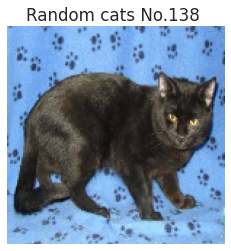

In [39]:
predict = model.predict(test_images) 
pred_labels = np.argmax(predict, axis = 1)

random_image(class_names, test_images, pred_labels)

## Wrong Prediction

In [ ]:
def wrong_prediction(class_names, test_images, test_labels, pred_labels):

    wrong_label = (test_labels == pred_labels)
    mislabeled_indices = np.where(wrong_label == 1)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    group_random_image(class_names,  mislabeled_images, mislabeled_labels)

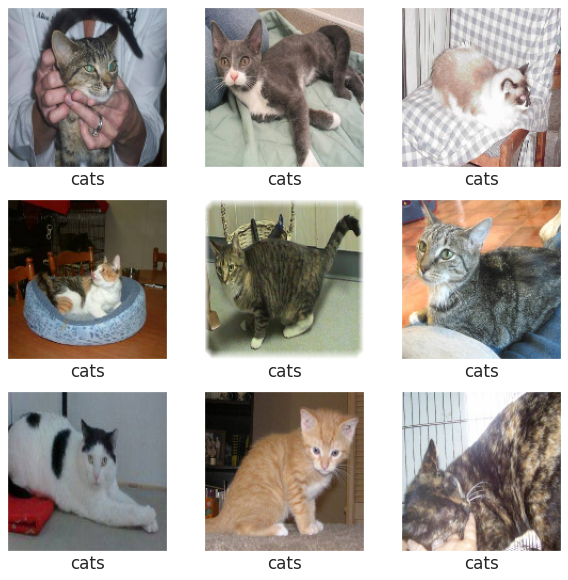

In [ ]:
wrong_prediction(class_names, test_images, test_labels, pred_labels)

`terlihat beberapa contoh dari prediksi yang salah, dimana dari gambar kucing diprediksi anjing oleh model`

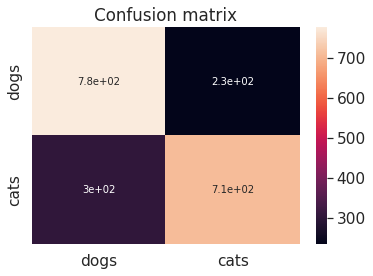

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

#### Conclusion: 

- prediksi terhadap dua label cukup baik dimana untuk true positif dan true negatif bernilai cukup tinggi
- namun, untuk false positif dan false negatif juga bernilai tinggi
- sehingga dibutuhkan improvement untuk mengurangin nilai false

***
PART 2 |  Trying to improve model
***

## Import Library

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from sklearn import decomposition
from sklearn.metrics import accuracy_score
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten
from keras.models import Model
from sklearn.metrics import accuracy_score

Feature extraction (ekstrak fitur dari VGG ImageNet)

In [ ]:
model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


model predict dengan menggunakan fitur dari VGG16

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

mencoba training menggunakan model dengan bantuan fitur dari vgg

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
51/51 [==============================] - 1s 9ms/step - loss: 0.4793 - accuracy: 0.8000 - val_loss: 0.2943 - val_accuracy: 0.8840
Epoch 2/10
51/51 [==============================] - 0s 6ms/step - loss: 0.2438 - accuracy: 0.8968 - val_loss: 0.2446 - val_accuracy: 0.8984
Epoch 3/10
51/51 [==============================] - 0s 7ms/step - loss: 0.1963 - accuracy: 0.9213 - val_loss: 0.2350 - val_accuracy: 0.8996
Epoch 4/10
51/51 [==============================] - 0s 6ms/step - loss: 0.1682 - accuracy: 0.9352 - val_loss: 0.2252 - val_accuracy: 0.9059
Epoch 5/10
51/51 [==============================] - 0s 6ms/step - loss: 0.1498 - accuracy: 0.9423 - val_loss: 0.2185 - val_accuracy: 0.9034
Epoch 6/10
51/51 [==============================] - 0s 6ms/step - loss: 0.1272 - accuracy: 0.9546 - val_loss: 0.2903 - val_accuracy: 0.8815
Epoch 7/10
51/51 [==============================] - 0s 7ms/step - loss: 0.1193 - accuracy: 0.9559 - val_loss: 0.2227 - val_accuracy: 0.9096
Epoch 8/10
51/51 [==

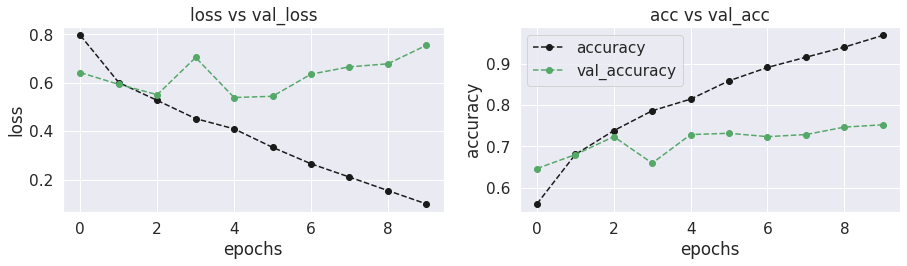

In [ ]:
evaluation_plot(history)

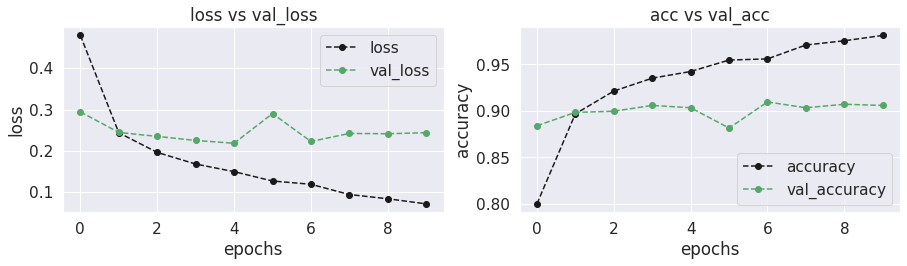

In [ ]:
evaluation_plot(history2)

`ini adalah hasil dari vgg, terlihat bahwa lossnya `

In [ ]:
test_loss = model2.evaluate(test_features, test_labels)

64/64 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.9030


coba beberapa kombinasi gabungan

In [ ]:
np.random.seed(seed=42)
n_estimators = 10
max_samples = 0.8 #proposi jumlah yang ditrain setiap epoch
max_samples *= n_train
max_samples = int(max_samples)

In [ ]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):

    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    models.append(model)

In [ ]:
histories = []

for i in range(n_estimators):
    # train model menggunakan random data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
45/45 [==============================] - 1s 16ms/step - loss: 0.3691 - accuracy: 0.8370 - val_loss: 0.2367 - val_accuracy: 0.9000
Epoch 2/10
45/45 [==============================] - 1s 13ms/step - loss: 0.1556 - accuracy: 0.9425 - val_loss: 0.1958 - val_accuracy: 0.9156
Epoch 3/10
45/45 [==============================] - 1s 14ms/step - loss: 0.1220 - accuracy: 0.9556 - val_loss: 0.1768 - val_accuracy: 0.9266
Epoch 4/10
45/45 [==============================] - 1s 14ms/step - loss: 0.0902 - accuracy: 0.9714 - val_loss: 0.1718 - val_accuracy: 0.9266
Epoch 5/10
45/45 [==============================] - 1s 15ms/step - loss: 0.0660 - accuracy: 0.9821 - val_loss: 0.1701 - val_accuracy: 0.9328
Epoch 6/10
45/45 [==============================] - 1s 14ms/step - loss: 0.0496 - accuracy: 0.9891 - val_loss: 0.1832 - val_accuracy: 0.9312
Epoch 7/10
45/45 [==============================] - 1s 13ms/step - loss: 0.0391 - accuracy: 0.9906 - val_loss: 0.1650 - val_accuracy: 0.9406
Epoch 8/10
45

- `terilihat nilai loss sudah mulai mengecil dan nilai accuracy sudah besar`
- `namun kita coba lagi dengan 1 model`

coba untuk menggabungkan setiap model

In [ ]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [ ]:
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.9065


Fine Tuning dengan VGG ImageNet

In [ ]:
model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # tentukan input layer yang diinginkan
layer_input = Input(shape = (9, 9, 512)) # jumlah input yang diinginkan

x = layer_input
for layer in model2.layers[-2::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

new_model = Model(layer_input, x)

In [ ]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 9, 9, 512)]       0         
                                                                 
 block5_conv3 (Conv2D)       multiple                  2359808   
                                                                 
 block5_pool (MaxPooling2D)  multiple                  0         
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 64)          294976    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 flatten_32 (Flatten)        (None, 64)                0         
                                                          

In [ ]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
50/50 [==============================] - 77s 2s/step - loss: 0.3959 - accuracy: 0.8166 - val_loss: 0.2272 - val_accuracy: 0.9081
Epoch 2/10
50/50 [==============================] - 76s 2s/step - loss: 0.1676 - accuracy: 0.9289 - val_loss: 0.2301 - val_accuracy: 0.9025
Epoch 3/10
50/50 [==============================] - 76s 2s/step - loss: 0.1047 - accuracy: 0.9594 - val_loss: 0.2274 - val_accuracy: 0.9087
Epoch 4/10
50/50 [==============================] - 76s 2s/step - loss: 0.0590 - accuracy: 0.9803 - val_loss: 0.2305 - val_accuracy: 0.9150
Epoch 5/10
50/50 [==============================] - 76s 2s/step - loss: 0.0275 - accuracy: 0.9922 - val_loss: 0.2859 - val_accuracy: 0.9194
Epoch 6/10
50/50 [==============================] - 76s 2s/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.2962 - val_accuracy: 0.9237
Epoch 7/10
50/50 [==============================] - 76s 2s/step - loss: 0.0177 - accuracy: 0.9955 - val_loss: 0.3143 - val_accuracy: 0.9287
Epoch 8/10
50/50 [==

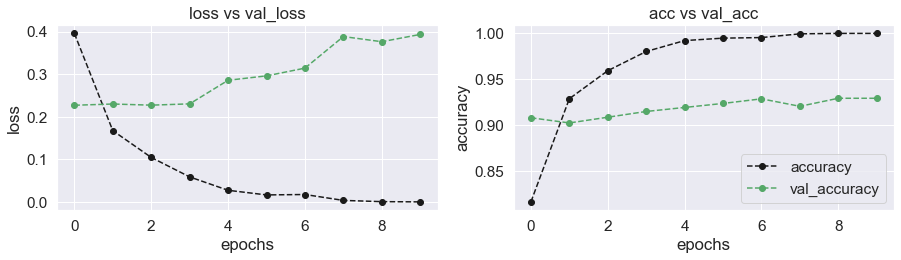

In [ ]:
evaluation_plot(history)

In [ ]:
predictions = new_model.predict(test_features)
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.932


model inference (test model dengan gambar baru)

In [ ]:
def image_prediction(images):
    index    = np.random.randint(pred_images.shape[0]) #membuat random index
    re_shape = pred_images[index].reshape(1,150,150,3) #reshape
    predict = new_model.predict(re_shape) #model predict
    pred_labels = np.argmax(predict, axis = 1) 
    
    if pred_labels[0] == 0:
      label_name = 'dog'
    else:
      label_name = 'cat'
  
    plt.figure();
    plt.imshow(pred_images[index]);
    plt.xticks([]);plt.yticks([]);plt.axis('off');
    plt.title('this is a {}'.format(label_name)+'(acc : {}'.format(accuracy_score(test_labels, pred_labels)))
    plt.show()

In [ ]:
image_prediction(pred_images)